In [1]:
# Importing Required Libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\sudha\Downloads\Bank+Dataset (1)\Bank Dataset\bank_marketing_updated_v1.csv")
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Data Cleaning

First two rows are not usefull so let's skip first two rows

In [5]:
# Using skiprows command to load the dataset without first two rows
df = pd.read_csv(r"C:\Users\sudha\Downloads\Bank+Dataset (1)\Bank Dataset\bank_marketing_updated_v1.csv", skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [6]:
# Dropping Cutsomer ID Column
df.drop(['customerid'], axis=1, inplace=True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
# Dividing jobedu column into job and education column
df['job'] = df.jobedu.apply(lambda x: x.split(',')[0])
df['education'] = df.jobedu.apply(lambda x: x.split(',')[1])
df.head()
                            

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [8]:
# Dropping jobedu column
df.drop(['jobedu'], axis=1, inplace=True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


Tried extracting month column but as it contains the missing values, without handling those not possible to proceed further.


### Handling Missing Values

In [11]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

month        0.110593
response     0.066356
age          0.044237
job          0.000000
poutcome     0.000000
previous     0.000000
pdays        0.000000
campaign     0.000000
duration     0.000000
day          0.000000
salary       0.000000
contact      0.000000
loan         0.000000
housing      0.000000
default      0.000000
targeted     0.000000
marital      0.000000
balance      0.000000
education    0.000000
dtype: float64

So, from the above list it's clear that the column `month`, `response` and `age` has missing values

#### A. Month Column

In [14]:
df.month.isnull().sum()

50

In [15]:
df.month.unique()

array(['may, 2017', nan, 'jun, 2017', 'jul, 2017', 'aug, 2017',
       'oct, 2017', 'nov, 2017', 'dec, 2017', 'jan, 2017', 'feb, 2017',
       'mar, 2017', 'apr, 2017', 'sep, 2017'], dtype=object)

Month is a categorical variable and there are 50 NaN present in the column. Imputing with mode is a standard approach for categorical values

In [17]:
month_mode = df.month.mode()[0]
df.month.fillna(month_mode, inplace=True)

#### B. Age Column

Age is a numeric column, it represnts the age group. We can check using a boxplot once before handling it


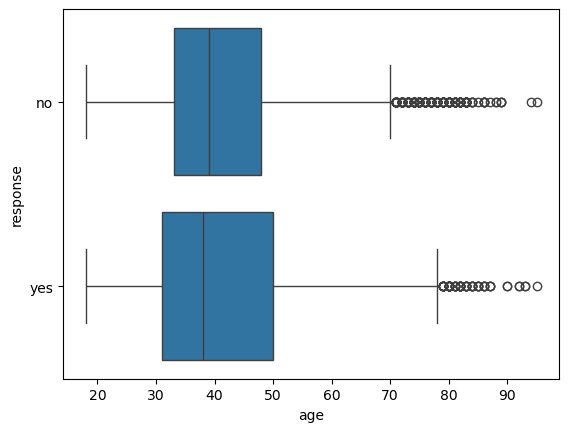

In [20]:
sns.boxplot(x='age', y='response', data=df)
plt.show()

In [21]:
df.age.mode()[0]

32.0

In [22]:
age_by_job = df.groupby('job')['age'].median()
age_by_marital = df.groupby('marital')['age'].median()

print("Median Age by Job Category:")
print(age_by_job)
print("\nMedian Age by Marital Status Category:")
print(age_by_marital)

Median Age by Job Category:
job
admin.           38.0
blue-collar      39.0
entrepreneur     41.0
housemaid        47.0
management       38.0
retired          59.0
self-employed    39.0
services         37.0
student          26.0
technician       37.0
unemployed       40.0
unknown          47.0
Name: age, dtype: float64

Median Age by Marital Status Category:
marital
divorced    45.0
married     42.0
single      32.0
Name: age, dtype: float64


Since each job category has distinct median ages, imputing based on job might be a reasonable choice. For instance, missing values for age in people with a job type of admin. could be filled with 38, while housemaid could be filled with 47, and so on.

In [24]:
# Fill missing values in 'age' based on median age within each 'job' category
df['age'] = df.groupby('job')['age'].transform(lambda x: x.fillna(x.median()))


In [25]:
df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [26]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Here, -1 represents NaN. If people is not contacted before than it is -1 which states no values.

In [28]:
# Dropping missing value rows present in pdays column
df.loc[df.pdays<0, 'pdays'] = np.NaN

In [29]:
df.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [30]:
df.response.fillna(df.response.mode()[0], inplace=True)

In [31]:
df.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        36954
previous         0
poutcome         0
response         0
job              0
education        0
dtype: int64

#### Handling Outliers

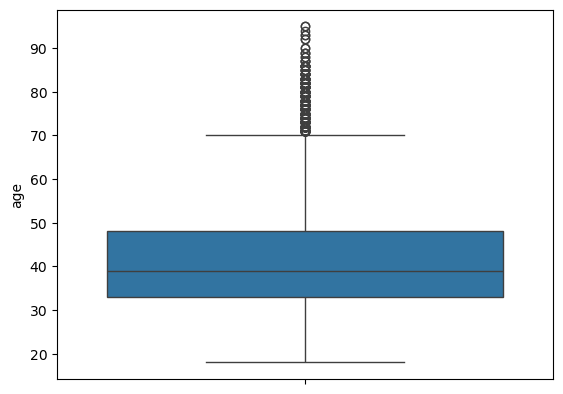

In [33]:
# age column
sns.boxplot(df.age)
plt.show()

Few customers may be a senior citizens so here we can consider outliers as normal values

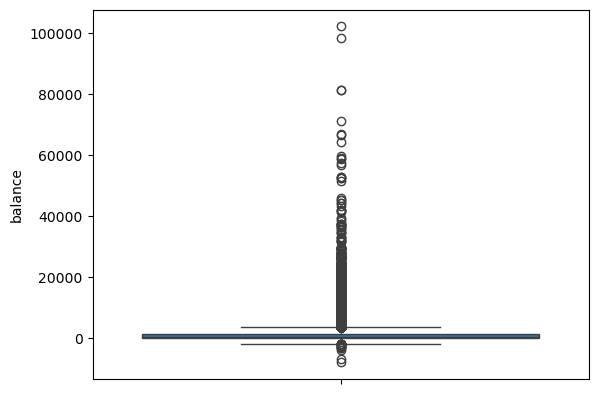

In [35]:
# Balance variable
sns.boxplot(df.balance)
plt.show()

#### Standardisation of Variables

In [37]:
df.duration = df.duration.apply(lambda x: float(x.split()[0])/60 if x.find('sec')>0 else float(x.split()[0]))

In [38]:
df.duration.describe()

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

#### Univariate Analysis

In [40]:
# Let's check the data types once
df.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

#### Univariate Analysis of Categorcial Features

1. Marital

df.marital.value_counts(normalize=True)

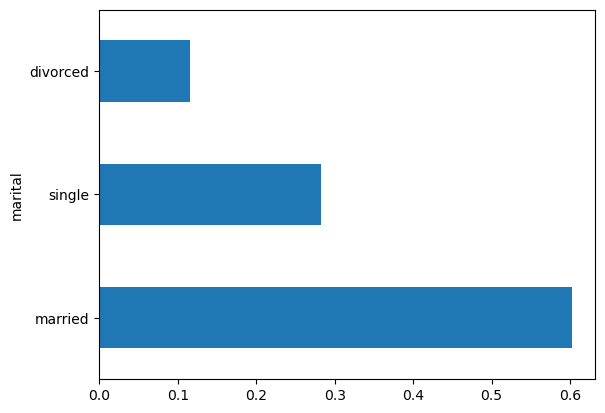

In [44]:
df.marital.value_counts(normalize=True).plot.barh()
plt.show()

Married people have been contacted the most by the bank

2. Education

<Axes: ylabel='proportion'>

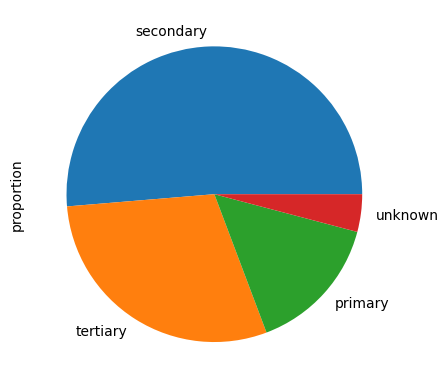

In [51]:
df.education.value_counts(normalize=True).plot.pie()

People with secondary education have been contacted the most by the bank

3. Response

<Axes: ylabel='proportion'>

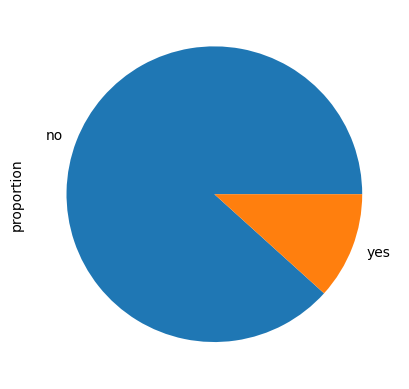

In [70]:
df.response.value_counts(normalize=True).plot.pie()

Most of the people said no in the campaign 

#### Bivariate Analysis

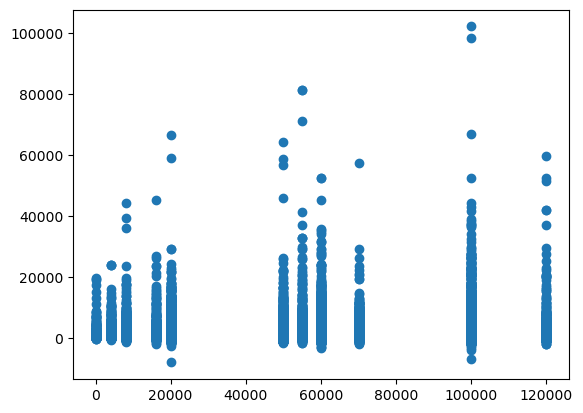

In [81]:
# Numerical - Numerical
plt.scatter(df.salary, df.balance)
plt.show()

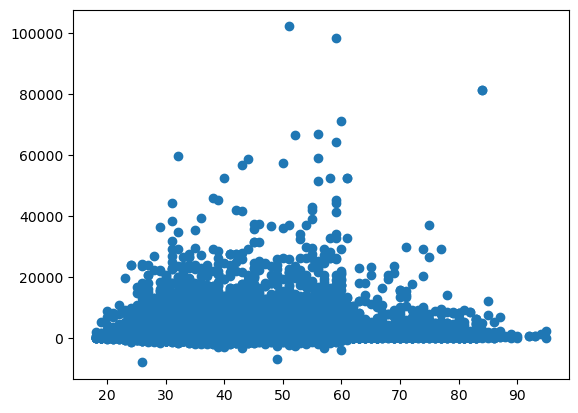

In [83]:
plt.scatter(df.age, df.balance)
plt.show()

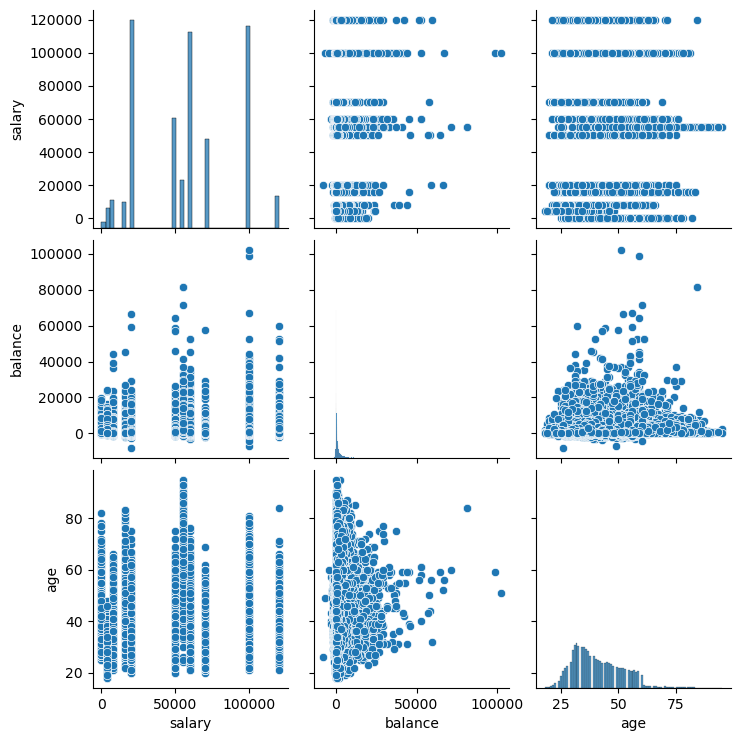

In [85]:
sns.pairplot(data=df, vars=['salary','balance','age'])
plt.show()

In [87]:
df.groupby('response')['salary'].mean()

response
no     56772.367498
yes    58771.704180
Name: salary, dtype: float64

In [91]:
df.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

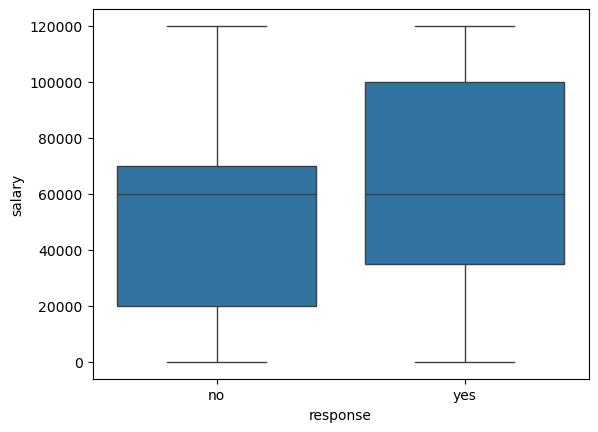

In [93]:
sns.boxplot(data=df, x='response', y='salary')
plt.show()

Salary seems to be affecting the response rate. People with above 60K salary responded yes in large number whereas below 60K responded No in large number

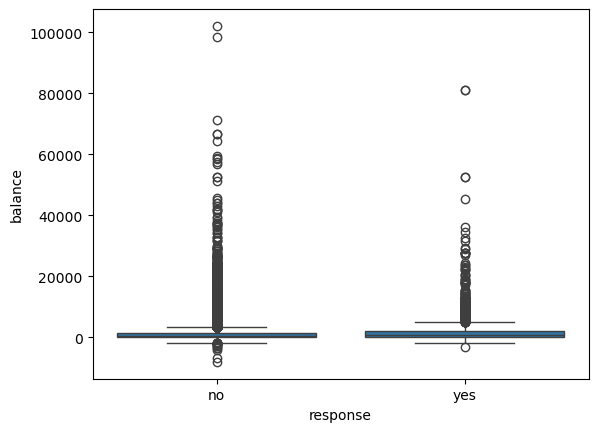

In [98]:
sns.boxplot(data=df, x='response', y='balance')
plt.show()

It's not giving any insights clearly. So let's check mean and median

In [101]:
df.groupby('response')['balance'].mean()

response
no     1303.665339
yes    1804.832041
Name: balance, dtype: float64

In [103]:
df.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64